# MNIST data load

In [1]:
from pathlib import Path
import requests

DATA_PATH = Path("data")
PATH = DATA_PATH / "mnist"

PATH.mkdir(parents=True, exist_ok=True)

URL = "https://github.com/pytorch/tutorials/raw/master/_static/"
FILENAME = "mnist.pkl.gz"

if not (PATH / FILENAME).exists():
        content = requests.get(URL + FILENAME).content
        (PATH / FILENAME).open("wb").write(content)

In [2]:
import pickle
import gzip

with gzip.open((PATH / FILENAME).as_posix(), "rb") as f:
        ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding="latin-1")

(50000, 784)


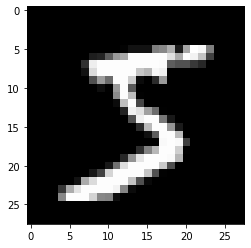

In [3]:
from matplotlib import pyplot
import numpy as np

pyplot.imshow(x_train[0].reshape((28, 28)), cmap="gray")
print(x_train.shape)

In [4]:
y_train

array([5, 0, 4, ..., 8, 4, 8], dtype=int64)

# model, Fully Connected Layer

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [6]:
class MNISTNet(nn.Module):
    def __init__(self):
        super(MNISTNet, self).__init__()
        
        self.fc1 = nn.Linear(784, 400)
        self.relu1 = nn.ReLU()

        self.fc2 = nn.Linear(400, 100)
        self.relu2 = nn.ReLU()
        
        self.fc3 = nn.Linear(100, 10)
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        
        x = self.fc2(x)
        x = self.relu2(x)
        
        x = self.fc3(x)
        
        return x

In [7]:
Net = MNISTNet()

In [8]:
Net

MNISTNet(
  (fc1): Linear(in_features=784, out_features=400, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=400, out_features=100, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=100, out_features=10, bias=True)
)

In [9]:
batch_size = 100

x = torch.randn(batch_size, 784)
x.shape

torch.Size([100, 784])

In [10]:
Net(x)

tensor([[-2.7721e-02,  1.3790e-03, -2.8348e-01,  7.8100e-02,  5.5203e-02,
         -9.5336e-02,  8.0686e-02,  2.3451e-02, -4.6472e-03,  1.4100e-01],
        [-5.8056e-02,  4.9296e-02, -4.0270e-02, -1.3801e-01, -6.8639e-03,
         -1.6362e-01, -2.1630e-03, -1.4591e-01, -2.1222e-02,  1.3711e-01],
        [ 1.8383e-02, -1.8767e-02, -2.6745e-02, -6.7755e-02,  6.8468e-02,
         -1.7739e-01,  6.9169e-02, -3.6202e-02, -1.0092e-01,  1.6089e-01],
        [-2.9776e-02,  5.5043e-02,  2.0140e-02,  5.7548e-02,  3.5415e-02,
         -1.8898e-01,  1.0747e-01,  4.4371e-02, -1.7979e-01,  1.9623e-01],
        [-8.0116e-02, -3.2846e-02, -1.0181e-01, -2.5580e-02, -1.9540e-02,
         -1.5016e-01,  3.6832e-02,  1.9453e-02, -2.0733e-01,  1.5966e-01],
        [-6.4888e-02,  1.2142e-01, -1.4295e-01,  4.3792e-02, -3.8982e-02,
         -1.4595e-01,  1.1465e-01, -3.2848e-02, -1.0126e-01,  8.9809e-02],
        [ 1.4286e-02, -2.0928e-02, -1.1294e-01,  3.2477e-02,  1.1231e-01,
         -1.3625e-01, -7.0443e-0

In [11]:
Net(x).shape

torch.Size([100, 10])

# data loader

In [12]:
(x_train, y_train), (x_valid, y_valid)

((array([[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
  array([5, 0, 4, ..., 8, 4, 8], dtype=int64)),
 (array([[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
  array([3, 8, 6, ..., 5, 6, 8], dtype=int64)))

In [13]:
from torch.utils.data import DataLoader
from torch.utils.data import Dataset

In [14]:
class MNISTData(Dataset):
    def __init__(self, dset='train'):
        if dset=='train':
            self.x = x_train
            self.y = y_train
        elif dset=='val':
            self.x = x_valid
            self.y = y_valid
        else:
            raise Exception('dset 정의 제대로 하셈 train or val')
            
    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]
    
    def __len__(self):
        return len(self.x)

In [32]:
train_data = MNISTData(dset='train')
val_data = MNISTData(dset='val')

In [16]:
len(train_data)

50000

(784,)
1


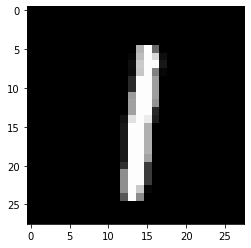

In [17]:
x, y = train_data[40]
pyplot.imshow(x.reshape((28, 28)), cmap="gray")
print(x.shape)
print(y)

In [33]:
train_loader = DataLoader(train_data, batch_size=8)
val_loader = DataLoader(val_data, batch_size=8)

In [19]:
train_x, train_y = iter(train_loader).__next__()
print(train_x.shape)
print(train_y.shape)

torch.Size([8, 784])
torch.Size([8])


In [20]:
train_y

tensor([5, 0, 4, 1, 9, 2, 1, 3])

# train

In [21]:
import torch.nn.functional as F

In [22]:
loss_func = F.cross_entropy
loss_func

<function torch.nn.functional.cross_entropy(input: torch.Tensor, target: torch.Tensor, weight: Union[torch.Tensor, NoneType] = None, size_average: Union[bool, NoneType] = None, ignore_index: int = -100, reduce: Union[bool, NoneType] = None, reduction: str = 'mean') -> torch.Tensor>

In [23]:
import torch.optim as optim

In [24]:
Net

MNISTNet(
  (fc1): Linear(in_features=784, out_features=400, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=400, out_features=100, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=100, out_features=10, bias=True)
)

In [25]:
optimizer = optim.Adam(Net.parameters(), lr=1e-3)

In [26]:
from tqdm import tqdm

In [27]:
for epoch in range(3):
    for x, y in tqdm(train_loader):
        pred = Net(x)
        loss = loss_func(pred, y)
        
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    
    print(loss.item())

  1%|▊                                                                              | 62/6250 [00:00<00:20, 308.82it/s]

0.050463978201150894


  1%|▋                                                                              | 52/6250 [00:00<00:24, 256.29it/s]

0.031030483543872833


100%|█████████████████████████████████████████████████████████████████████████████| 6250/6250 [00:21<00:00, 295.33it/s]

0.0038604778237640858


In [30]:
def accuracy(model, data_loader):
    correct = 0
    with torch.no_grad():
        for x,y in tqdm(data_loader):
            pred = model(x)
            correct += pred.argmax(dim=1).eq(y).sum().item()
    
    accuracy = 100 * correct / len(data_loader.dataset)
    print(accuracy)
    
    return accuracy

In [31]:
accuracy(Net, train_loader)

100%|████████████████████████████████████████████████████████████████████████████| 6250/6250 [00:01<00:00, 3790.89it/s]

98.336


98.336

In [34]:
accuracy(Net, val_loader)

100%|████████████████████████████████████████████████████████████████████████████| 1250/1250 [00:00<00:00, 3463.89it/s]

97.39


97.39

# save and load

In [36]:
Net.state_dict()

OrderedDict([('fc1.weight',
              tensor([[-0.0278, -0.0024,  0.0318,  ..., -0.0063, -0.0055, -0.0317],
                      [ 0.0293,  0.0250,  0.0098,  ..., -0.0093, -0.0353, -0.0217],
                      [-0.0042,  0.0100,  0.0013,  ..., -0.0228, -0.0274, -0.0314],
                      ...,
                      [-0.0080,  0.0267,  0.0069,  ..., -0.0166, -0.0059,  0.0070],
                      [ 0.0240, -0.0209, -0.0017,  ...,  0.0187, -0.0122,  0.0151],
                      [ 0.0241, -0.0024, -0.0043,  ..., -0.0332,  0.0101,  0.0141]])),
             ('fc1.bias',
              tensor([-1.3638e-01,  4.8785e-02, -1.2979e-01, -5.7422e-02, -8.7317e-02,
                      -3.5953e-02, -3.1677e-02,  2.6225e-02, -1.8546e-02, -2.8241e-02,
                      -2.6012e-02, -2.7197e-02, -4.3747e-02, -3.6820e-03,  3.9711e-02,
                      -9.6093e-02, -4.7992e-03, -6.3259e-02,  1.7215e-02, -2.3305e-02,
                       8.3237e-02, -1.0370e-01, -8.8575e-02, -2.

In [ ]:
torch.save(Net.state_dict(), './model.pt')

In [ ]:
model = TheModelClass(*args, **kwargs)
model.load_state_dict(torch.load(PATH))
model.eval()